<a id="99"></a>
# Python 10 Assignment
### Purpose: To Create and Evaluate a Logistic Regression Model
<b>Program Sections</b>
<ul>
<li><a href = "#0">Import Python Packages</a></li>
<li><a href = "#1">Set Display</a></li>
<li><a href = "#2">Load the Data and Evaluate Fields</a></li>
<li><a href = "#3">Determine Baseline Accuracy</a></li>    
<li><a href = "#4">Create Training (Validation) and Testing Datasets</a></li>
<li><a href = "#5">Create and Evaluate a Full Logistic Regression Model</a></li>
<li><a href = "#6">Use Recursive Feature Elimination to Parse Model</a></li>
<li><a href = "#7">Evaluate Logistic Regression Model based on Threshold Setting</a></li>
<li><a href = "#8">Predict Retention for New Customer</a></li>
<li><a href = "#9">Assignment Submission</a></li></ul>

<a id="0"></a>
### Import Python Packages
<a href = "#99">Top</a>

In [1]:
# Code Block 0
import numpy as np 
import pandas as pd 
import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib import style

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, f1_score

<a id="1"></a>
### Set Display
<a href = "#99">Top</a>

In [2]:
# Code Block 1
# Set display to show up to 100 columns in dataframe
pd.set_option('display.max_columns',100) 

# Set plot style
plt.style.use('seaborn')

<a id="2"></a>
### Load the Data and Evaluate Fields
<a href = "#99">Top</a>

In [3]:
# Code Block 2
# Read CSV file into dataframe
df_cellco = pd.read_csv("Cellco Churn Data - Features.csv",encoding="latin1")

In [4]:
# Code Block 3
# Fields and data that are available in the dataframe ... and position
df_cellco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 44 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Customer ID                            7043 non-null   object 
 1   Gender                                 7043 non-null   int64  
 2   Senior Citizen                         7043 non-null   int64  
 3   Spouse/Partner                         7043 non-null   int64  
 4   Dependents                             7043 non-null   int64  
 5   Tenure                                 7043 non-null   int64  
 6   Phone Service                          7043 non-null   int64  
 7   Monthly Charges                        7043 non-null   float64
 8   Lifetime Charges                       7043 non-null   float64
 9   Retained                               7043 non-null   int64  
 10  Multiple Lines=No                      7043 non-null   int64  
 11  Mult

In [5]:
# Code Block 4
# What does the actual data look like?
df_cellco.sample(10)

,Customer ID,Gender,Senior Citizen,Spouse/Partner,Dependents,Tenure,Phone Service,Monthly Charges,Lifetime Charges,Retained,Multiple Lines=No,Multiple Lines=No Phone Service,Multiple Lines=Yes,Internet Service=DSL,Internet Service=Fiber optic,Internet Service=No,Online Security=No,Online Security=No Internet Service,Online Security=Yes,Online Backup=No,Online Backup=No Internet Service,Online Backup=Yes,Device Protection=No,Device Protection=No Internet Service,Device Protection=Yes,Tech Support=No,Tech Support=No Internet Service,Tech Support=Yes,Streaming TV=No,Streaming TV=No Internet Service,Streaming TV=Yes,Streaming Movies=No,Streaming Movies=No Internet Service,Streaming Movies=Yes,Contract=Month-to-month,Contract=One year,Contract=Two year,Paperless Billing=No,Paperless Billing=Yes,Payment Method=Bank Transfer,Payment Method=Credit Card,Payment Method=Electronic check,Payment Method=Mailed check,Total Services
4101,5797-APWZC,0,0,0,0,1,1,90.60,90.60,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,4
257,0383-CLDDA,0,0,0,0,69,1,85.35,5897.40,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,8
5727,8063-RJYNF,1,0,0,0,16,1,94.25,1483.25,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,5
1365,2027-FECZV,1,0,0,0,12,1,106.70,1253.90,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,7
4219,5955-EPOAZ,0,0,0,0,6,1,20.95,109.50,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,1
4015,5656-JAMLX,1,0,0,0,62,1,19.85,1253.65,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,1
2571,3675-YDUPJ,1,0,0,0,10,1,19.85,193.05,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,1
5863,8242-JSVBO,1,0,0,0,7,1,44.65,322.50,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,2
3016,4316-XCSLJ,1,0,0,1,17,1,50.30,846.80,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,3
238,0365-GXEZS,1,0,1,0,18,1,78.20,1468.75,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,4


In [6]:
# Code Block 5
# Field names for access
df_cellco.columns

Index(['Customer ID', 'Gender', 'Senior Citizen', 'Spouse/Partner',
       'Dependents', 'Tenure', 'Phone Service', 'Monthly Charges',
       'Lifetime Charges', 'Retained', 'Multiple Lines=No',
       'Multiple Lines=No Phone Service', 'Multiple Lines=Yes',
       'Internet Service=DSL', 'Internet Service=Fiber optic',
       'Internet Service=No', 'Online Security=No',
       'Online Security=No Internet Service', 'Online Security=Yes',
       'Online Backup=No', 'Online Backup=No Internet Service',
       'Online Backup=Yes', 'Device Protection=No',
       'Device Protection=No Internet Service', 'Device Protection=Yes',
       'Tech Support=No', 'Tech Support=No Internet Service',
       'Tech Support=Yes', 'Streaming TV=No',
       'Streaming TV=No Internet Service', 'Streaming TV=Yes',
       'Streaming Movies=No', 'Streaming Movies=No Internet Service',
       'Streaming Movies=Yes', 'Contract=Month-to-month', 'Contract=One year',
       'Contract=Two year', 'Paperless Billing=N

<a id="3"></a>
### Determine Baseline Accuracy
<a href = "#99">Top</a>

In [7]:
# Code Block 6
# Baseline accuracy is if we predicted all individuals would remain or churn
# This is the standard that needs to be improved upon
df_cellco['Retained'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

1    73.5%
0    26.5%
Name: Retained, dtype: object

<a id="4"></a>
### Create Training (Validation) and Testing Datasets
<a href = "#99">Top</a>

In [8]:
# Code Block 7
# Create a list of features to be utilized
X_names = df_cellco.columns.values.tolist()
X_names.remove('Customer ID')
X_names.remove('Retained')

# Create X matrix of features
X = df_cellco[X_names].copy()

# Create y vector of retained results
y = df_cellco[['Retained']].copy()

In [9]:
# Code Block 8
# Split the data into 80% training and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state=42)

<a id="5"></a>
### Create and Evaluate a Full Logistic Regression Model
<a href = "#99">Top</a>

In [10]:
# Code Block 9
# Define logistic regression model and class weights
weights = {0: 0.75, 1: 0.25}
logreg = LogisticRegression(max_iter=500, class_weight=weights)

In [11]:
# Code Block 10
# Fit logistic model
logreg_result = logreg.fit(X_train,y_train.values.ravel())

# Show overall accuracy
print('Overall Accuracy:  {:.2%}'.format(logreg_result.score(X_train,y_train)))

Overall Accuracy:  74.51%


<a id="6"></a>
### Use Recursive Feature Elimination to Parse Model
<a href = "#99">Top</a>

Optimal number of features: 37

Selected features:  ['Gender', 'Senior Citizen', 'Dependents', 'Tenure', 'Phone Service', 'Multiple Lines=No', 'Multiple Lines=No Phone Service', 'Multiple Lines=Yes', 'Internet Service=DSL', 'Internet Service=Fiber optic', 'Internet Service=No', 'Online Security=No', 'Online Security=No Internet Service', 'Online Security=Yes', 'Online Backup=No', 'Online Backup=No Internet Service', 'Online Backup=Yes', 'Device Protection=No', 'Device Protection=No Internet Service', 'Tech Support=No', 'Tech Support=No Internet Service', 'Tech Support=Yes', 'Streaming TV=No', 'Streaming TV=No Internet Service', 'Streaming TV=Yes', 'Streaming Movies=No', 'Streaming Movies=No Internet Service', 'Streaming Movies=Yes', 'Contract=Month-to-month', 'Contract=Two year', 'Paperless Billing=No', 'Paperless Billing=Yes', 'Payment Method=Bank Transfer', 'Payment Method=Credit Card', 'Payment Method=Electronic check', 'Payment Method=Mailed check', 'Total Services']


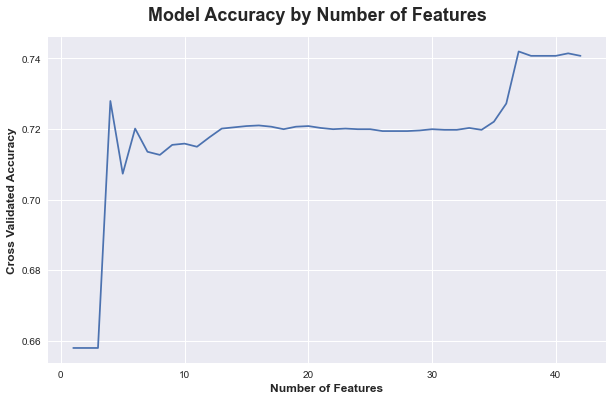

In [12]:
# Code Block 11
# Define cross-validated recursive feature elimination (RFE) to parse features
rfecv_model = RFECV(estimator=logreg, step=1, cv=10, scoring='accuracy')

# Fit RFE model
rfe_best = rfecv_model.fit(X_train,y_train.values.ravel())

# Show results
print('Optimal number of features: {:d}'.format(rfe_best.n_features_))
print('\nSelected features: ', list(X_train.columns[rfe_best.support_]))

# Plot number of features vs cross-validated accuracy score
plt.figure(figsize=(10,6))
plt.suptitle('Model Accuracy by Number of Features', fontweight='bold', 
          fontsize='18', ha='center', y=.95)
plt.xlabel('Number of Features', fontweight='bold', fontsize=12)
plt.ylabel('Cross Validated Accuracy', fontweight='bold', fontsize=12)
plt.plot(range(1, len(rfe_best.grid_scores_) + 1), rfe_best.grid_scores_)
plt.show()

In [13]:
# Code Block 12
# Create list of feature names from RFE-derived model
Xrfe_names = list(X_train.columns[rfe_best.support_])

# Create X matrix of features from RFE-derived model
Xrfe_train = X_train[Xrfe_names].copy()
Xrfe_test = X_test[Xrfe_names].copy()

In [14]:
# Code Block 13
# Fit RFE-derived model
logreg_result = logreg.fit(Xrfe_train,y_train.values.ravel())

ypred_train = logreg_result.predict(Xrfe_train)
yprob_train = logreg_result.predict_proba(Xrfe_train)[:,1]

# Show overall accuracy
print('Overall Accuracy:  {:.2%}'.format(logreg_result.score(Xrfe_train,y_train)))

Overall Accuracy:  74.12%


##### Evaluate Coefficients from Logistic Regression Model

In [15]:
# Code Block 14
# Show intercept value for RFE-derived model
print('Intercept Odds for RFE-Derived Model: {:f}'.format(np.exp(logreg_result.intercept_[0])))

Intercept Odds for RFE-Derived Model: 1.004646


In [16]:
# Code Block 15
# Show logistic regression log-Odds coefficients and Odds coefficients

# Create dataframe with feature names in model
feature_names = pd.DataFrame(Xrfe_names, columns = ['Feature'])

# Create column with Log-Odds coefficients
log_coef = pd.DataFrame(np.transpose(logreg_result.coef_), columns = ['Log Coefficient'])

# Concatenate feature names and coefficients
coefficients = pd.concat([feature_names, log_coef], axis = 1)

# Create new column with Odds coefficients
coefficients['Odds Coefficient'] = np.exp(coefficients['Log Coefficient'])

# Show dataframe
# Remember, Log-Odds coefficients add and Odds coefficients multiply
coefficients

,Feature,Log Coefficient,Odds Coefficient
0,Gender,0.018762,1.018939
1,Senior Citizen,-0.200950,0.817954
2,Dependents,0.137541,1.147449
3,Tenure,0.032689,1.033230
4,Phone Service,0.158250,1.171459
5,Multiple Lines=No,0.198865,1.220017
6,Multiple Lines=No Phone Service,-0.153977,0.857292
7,Multiple Lines=Yes,-0.040614,0.960200
8,Internet Service=DSL,0.391269,1.478856
9,Internet Service=Fiber optic,-0.483343,0.616718


##### Evaluate Probabilities and Predictions from Logistic Model

In [17]:
# Code Block 16
# Make working copy of t_training data
ypred_temp = y_train.copy()

# Add probability of customer retention
ypred_temp['Probability'] = logreg_result.predict_proba(Xrfe_train)[:,1]

# Add prediction of customer retention
ypred_temp['Prediction'] = logreg_result.predict(Xrfe_train)

ypred_temp.sample(10, random_state=42)

,Retained,Probability,Prediction
3575,1,0.570509,1
4958,1,0.987053,1
1447,1,0.914449,1
3334,0,0.291413,0
4041,0,0.360608,0
2923,1,0.415428,0
5447,0,0.136103,0
5429,0,0.614024,1
6882,1,0.478874,0
6722,1,0.148910,0


<a id="7"></a>
### Evaluate Logistic Regression Model based on Threshold Setting
<a href = "#99">Top</a>

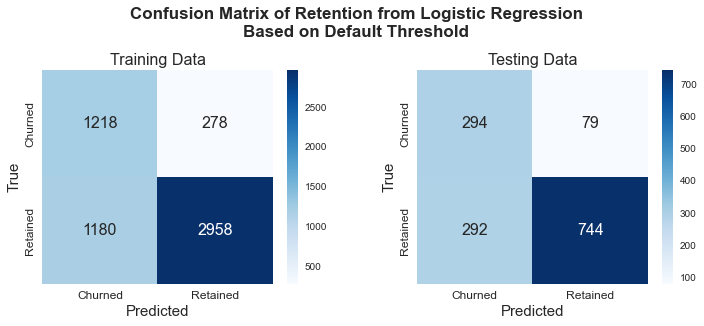

In [18]:
# Code Block 17
# Create a confusion matrix showing the predicted and true results for training data
cm_train = confusion_matrix(y_train, ypred_train)

# Predict results for testing data
ypred_test = logreg_result.predict(Xrfe_test)

# Create a confusion matrix showing the predicted and true results for testing data
cm_test = confusion_matrix(y_test, ypred_test)

# Create a heat map showing the results of the confusion matrix
fig, axes = plt.subplots(ncols=2,figsize=(10, 4))

fig.suptitle('Confusion Matrix of Retention from Logistic Regression\nBased on Default Threshold', 
             fontweight='bold', fontsize=17, y = 1.12)
ax1, ax2 = axes
heat1 = sns.heatmap(cm_train, annot=True, cmap="Blues", annot_kws={"size": 16}, ax = ax1, fmt = "g")
heat2 = sns.heatmap(cm_test, annot=True, cmap="Blues", annot_kws={"size": 16}, ax = ax2, fmt = "g")

ax1.set_title('Training Data', fontsize=16)
ax1.set_xlabel('Predicted', fontsize=15)
ax1.set_ylabel('True', fontsize=15)
ax1.xaxis.set_ticklabels(['Churned', 'Retained'], fontsize=12)
ax1.yaxis.set_ticklabels(['Churned', 'Retained'], fontsize=12, va ='center')

ax2.set_title('Testing Data', fontsize=16)
ax2.set_xlabel('Predicted', fontsize=15)
ax2.set_ylabel('True', fontsize=15)
ax2.xaxis.set_ticklabels(['Churned', 'Retained'], fontsize=12)
ax2.yaxis.set_ticklabels(['Churned', 'Retained'], fontsize=12, va ='center')

plt.tight_layout()
plt.subplots_adjust(wspace=.3)
plt.show()

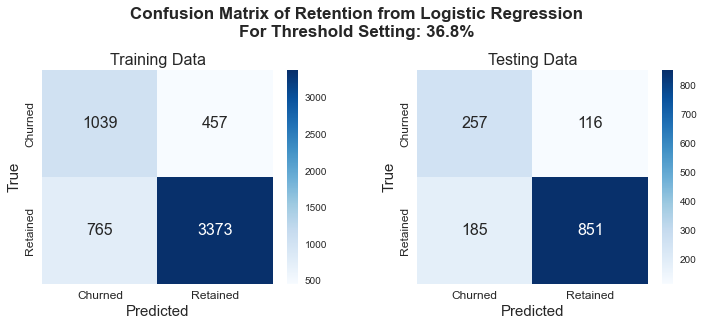

In [19]:
# Code Block 18
# Probability is with respect to retention, not churn
# Set cutoff threshold for classifying each observation in the data as retained
threshold = 0.368

# Using cutoff threshold, classify observations in training data
ypred_train = (logreg_result.predict_proba(Xrfe_train)[:,1] >= threshold).astype(int)

# Create a confusion matrix showing the predicted and true results for training data
cm_train = confusion_matrix(y_train, ypred_train)

# Using cutoff threshold, classify observations in testing data
ypred_test = (logreg_result.predict_proba(Xrfe_test)[:,1] >= threshold).astype(int)

# Create a confusion matrix showing the predicted and true results for testing data
cm_test = confusion_matrix(y_test, ypred_test)

# Create a heat map showing the results of the confusion matrix
fig, axes = plt.subplots(ncols=2,figsize=(10, 4))

fig.suptitle('Confusion Matrix of Retention from Logistic Regression\nFor Threshold Setting: {:.1%}'.format(threshold), 
             fontweight='bold', fontsize=17, y = 1.12)
ax1, ax2 = axes
heat1 = sns.heatmap(cm_train, annot=True, cmap="Blues", annot_kws={"size": 16}, ax = ax1, fmt = "g")
heat2 = sns.heatmap(cm_test, annot=True, cmap="Blues", annot_kws={"size": 16}, ax = ax2, fmt = "g")

ax1.set_title('Training Data', fontsize=16)
ax1.set_xlabel('Predicted', fontsize=15)
ax1.set_ylabel('True', fontsize=15)
ax1.xaxis.set_ticklabels(['Churned', 'Retained'], fontsize=12)
ax1.yaxis.set_ticklabels(['Churned', 'Retained'], fontsize=12, va ='center')

ax2.set_title('Testing Data', fontsize=16)
ax2.set_xlabel('Predicted', fontsize=15)
ax2.set_ylabel('True', fontsize=15)
ax2.xaxis.set_ticklabels(['Churned', 'Retained'], fontsize=12)
ax2.yaxis.set_ticklabels(['Churned', 'Retained'], fontsize=12, va ='center')

plt.tight_layout()
plt.subplots_adjust(wspace=.3)
plt.show()

##### Search for "optimal" threshold settings

In [20]:
# Code Block 19
# Set up range of possible thresholds to test from 0 to 1 in steps of .01
thresholds = np.arange(0, 1, .01)

# create function to compare thresholds to probabilities to create binary labels
def classify_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype(int)

# Get accuracy scores for all threshold values
accuracy_scores = [accuracy_score(y_train, classify_labels(yprob_train, t)) for t in thresholds]

# Get f1 scores for all threshold values
f1_scores = [f1_score(y_train, classify_labels(yprob_train, t)) for t in thresholds]

# get optimal threshold value based on training data for accuracy and f1 scores
best_accuracy_cutoff = np.argmax(accuracy_scores)
best_f1_cutoff = np.argmax(f1_scores)

print('Results from Training Data')
print('Threshold = {:.2f}, Accuracy Score = {:.2%}'.format(thresholds[best_accuracy_cutoff], 
                                                   accuracy_scores[best_accuracy_cutoff]))

print('Threshold = {:.2f}, F1 Score = {:.2%}'.format(thresholds[best_f1_cutoff], 
                                                     f1_scores[best_f1_cutoff]))

Results from Training Data
Threshold = 0.22, Accuracy Score = 80.65%
Threshold = 0.21, F1 Score = 87.51%


Results from Best Accuracy Threshold - Testing Data
Accuracy: 80.27%
Report: 
               precision    recall  f1-score   support

     Churned      0.688     0.466     0.556       373
    Retained      0.828     0.924     0.873      1036

    accuracy                          0.803      1409
   macro avg      0.758     0.695     0.715      1409
weighted avg      0.791     0.803     0.789      1409



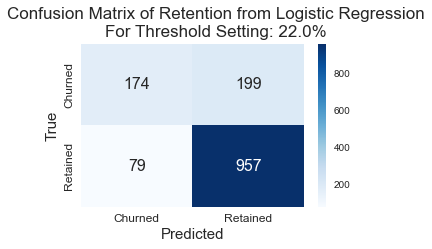

In [21]:
# Code Block 20
# Calculate probability of retention for each observation in test data

# Using the threshold from accuracy search, classify customers
yaccuracypred_test = (logreg_result.predict_proba(Xrfe_test)[:,1]  >= thresholds[best_accuracy_cutoff]).astype(int)

# Create a confusion matrix showing the predicted and true results
accuracy_cm = confusion_matrix(y_test, yaccuracypred_test) 

# Print statistics from best accuracy threshold
print("Results from Best Accuracy Threshold - Testing Data")
print("Accuracy: {:.2%}".format(accuracy_score(y_test, yaccuracypred_test)))
print("Report: \n", classification_report(y_test, yaccuracypred_test, 
                                          target_names = ['Churned', 'Retained'], digits = 3))

# Create a heat map showing the results of the confusion matrix
fig, axes = plt.subplots(nrows=1, ncols=1, sharex = True, figsize=(5, 3))
fig.suptitle('Confusion Matrix of Retention from Logistic Regression\nFor Threshold Setting: {:.1%}'\
             .format(thresholds[best_accuracy_cutoff]), fontsize=17, y = 1.05)
ax = plt.subplot()
sns.heatmap(accuracy_cm, annot=True, cmap="Blues", annot_kws={"size": 16}, ax = ax, fmt = "g")
ax.set_xlabel('Predicted', fontsize=15)
ax.set_ylabel('True', fontsize=15)
ax.xaxis.set_ticklabels(['Churned', 'Retained'], fontsize=12)
ax.yaxis.set_ticklabels(['Churned', 'Retained'], fontsize=12, va ='center')
plt.show()

Results from Best F1 Score Threshold - Testing Data
Accuracy: 79.91%
Report: 
               precision    recall  f1-score   support

     Churned      0.692     0.434     0.534       373
    Retained      0.820     0.931     0.872      1036

    accuracy                          0.799      1409
   macro avg      0.756     0.682     0.703      1409
weighted avg      0.787     0.799     0.782      1409



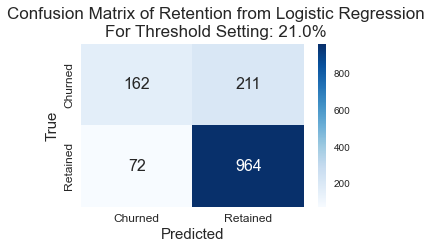

In [22]:
# Code Block 21
# Calculate probability of retention for each observation in test data

# Using the threshold from f1 score search, classify customers
yf1pred_test = (logreg_result.predict_proba(Xrfe_test)[:,1] >= thresholds[best_f1_cutoff]).astype(int)

# Create a confusion matrix showing the predicted and true results
f1_cm = confusion_matrix(y_test, yf1pred_test) 

# Print statistics from best f1 score threshold
print("Results from Best F1 Score Threshold - Testing Data")
print("Accuracy: {:.2%}".format(accuracy_score(y_test, yf1pred_test)))
print("Report: \n", classification_report(y_test, yf1pred_test, 
                                          target_names = ['Churned', 'Retained'], digits = 3))

# Create a heat map showing the results of the confusion matrix
fig, axes = plt.subplots(nrows=1, ncols=1, sharex = True, figsize=(5, 3))
fig.suptitle('Confusion Matrix of Retention from Logistic Regression\nFor Threshold Setting: {:.1%}'\
             .format(thresholds[best_f1_cutoff]), fontsize=17, y = 1.05)
ax = plt.subplot()
sns.heatmap(f1_cm, annot=True, cmap="Blues", annot_kws={"size": 16}, ax = ax, fmt = "g")
ax.set_xlabel('Predicted', fontsize=15)
ax.set_ylabel('True', fontsize=15)
ax.xaxis.set_ticklabels(['Churned', 'Retained'], fontsize=12)
ax.yaxis.set_ticklabels(['Churned', 'Retained'], fontsize=12, va ='center')
plt.show()

<a id="8"></a>
### Predict Retention for New Customer
<a href = "#99">Top</a>

In [23]:
# Code Block 22
# Create empty copy of dataframe used in model
df_predNew = X_test.head(0).copy()

# Create a prediction probability for the following person:
# Individual is a 45-year-old male. He is married and has two children. He has had phone 
# service with the company for 1 year, with monthly charges of $36 and total charges incurred to 
# date of $453.  He has two phone lines and internet service connection via fiber optics; no 
# additional intenet services have been purchased although he does stream TV and movies. His 
# contract has a single year basis and payments are made via bank transfer. Bills are paperless.
df_predNew.loc[0] = [1, 0, 1, 1, 12, 1, 36, 453, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 
                     0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 5]

# Restrict features to those used in the model
df_predNew = df_predNew[Xrfe_names]

In [24]:
# Code Block 23
# Predict probabilty that customer will be retained using logistic regression
newObs_PredProb = logreg_result.predict_proba(df_predNew)[0:,1][0]
print("Probabilty that Customer will be Retained: {:.2%}".format(newObs_PredProb))
print('What threshold will you use?')

Probabilty that Customer will be Retained: 44.14%
What threshold will you use?


<a id="9"></a>
### Assignment Submission
<a href = "#99">Top</a>

## Python Assignment 10
### Name: George Gannon

In [25]:
# Create a prediction probability for the following person:
# Individual is a 32-year-old female. She is single and has no children. She has had phone 
# service with the company for 5 months, with monthly charges of $47 and total charges incurred to 
# date of $274.  She has one phone line and internet service connection via fiber optics. Internet services purchased 
# include online security, online backup, tech support, streaming TV, and streaming movies. Her 
# contract is month-to-month and payments are made via credit card. Bills are paperless.
df_predNew.loc[1] = [0, 0, 0, 5, 1, 1, 0, 0, 0, 1, 0, 0, 0,1, 0, 0, 1, 0, 
                     0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 7]
# Show row with new customer
df_predNew[-1:]

,Gender,Senior Citizen,Dependents,Tenure,Phone Service,Multiple Lines=No,Multiple Lines=No Phone Service,Multiple Lines=Yes,Internet Service=DSL,Internet Service=Fiber optic,Internet Service=No,Online Security=No,Online Security=No Internet Service,Online Security=Yes,Online Backup=No,Online Backup=No Internet Service,Online Backup=Yes,Device Protection=No,Device Protection=No Internet Service,Tech Support=No,Tech Support=No Internet Service,Tech Support=Yes,Streaming TV=No,Streaming TV=No Internet Service,Streaming TV=Yes,Streaming Movies=No,Streaming Movies=No Internet Service,Streaming Movies=Yes,Contract=Month-to-month,Contract=Two year,Paperless Billing=No,Paperless Billing=Yes,Payment Method=Bank Transfer,Payment Method=Credit Card,Payment Method=Electronic check,Payment Method=Mailed check,Total Services
1,0,0,0,5,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,1,0,0,7


In [26]:
# Show probability that new customer will be retained using logistic regression
newObs_PredProb = logreg_result.predict_proba(df_predNew)[-1:,1][0]
print("Probabilty that Customer will be Retained: {:.2%}".format(newObs_PredProb))

Probabilty that Customer will be Retained: 24.55%


In [27]:
import datetime, socket
print(datetime.datetime.now().isoformat())
print("Your Computer Name is: " + socket.gethostname())
print("Your Computer IP Address is: " + socket.gethostbyname(socket.gethostname()))

2020-11-19T10:58:23.394455
Your Computer Name is: DESKTOP-0VRDGNF
Your Computer IP Address is: 192.168.1.139
